# Tutorial 14: Solving boundary-value ODEs

## PHYS 2600

In [3]:
## Common import cell!

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## T14.1 - Solving the time-independent Schrodinger equation

Let's be ambitious!  We'll solve the __time-independent Schrodinger equation__,

$$
\frac{d^2 \psi}{dx^2} = \frac{2m}{\hbar^2} [V(x) - E] \psi(x).
$$

Here $\psi(x)$ is the wavefunction for a single particle of mass $m$ and energy $E$, and $|\psi(x)|^2$ is the probability of measuring the particle at position $x$.  

<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/schrodinger-solns.png" width=500px style="float:right;" />

In general, this is a dangerous system to use shooting methods on!  As you know, solutions to the Schrodinger equation are exponential in regions where $E < V$.  The growing exponential solutions can easily cause numerical instability.  However, some problems are relatively easy.  

We'll focus on one such case:  the __infinite square well__.  Here is our potential energy function for the well:

$$
V(x) = \begin{cases} 
0, 0 \leq x \leq L; \\ 
\infty, {\rm elsewhere}.
\end{cases}
$$

This makes the boundary conditions nice and simple: the particle can't exist where the potential is infinity, so we must have

$$
\psi(0) = \psi(L) = 0.
$$

Strictly speaking, we should do all of this with complex numbers since this is quantum mechanics.  However, when we work with the time-independent Schrodinger equation, it's _always_ possible to find solutions for $\psi(x)$ using only real numbers.  (The complex phase becomes crucial when we allow time evolution to happen.)

Of course, we can solve the infinite well analytically too!  Here's a little summary plot from PHYS 2130 to remind you of the details:

<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/inf_sq_well_summary.png" width=600px />

Now we need to set up the discrete version of our differential equation.  We're going to keep $V(x)$ completely general for now, since we'll alter the infinite well slightly later on.  

We will do this on the blackboard in class!  (My solutions will contain the derivation too; you _don't_ need to type it in to the answer box.)  We'll introduce the auxiliary variable $\chi \equiv d\psi/dx$ as part of the derivation.

__Divide into two first-order equations: define__

$$
\chi = \frac{d\psi}{dx}
$$

__Then__
$$
\frac{d\chi}{dx} = \frac{2m[V(x)-E]}{\hbar^2} \psi(x) \\
\frac{d\psi}{dx} = \chi(x)
$$

__Finally, make it discrete: taking $x \rightarrow x_i$, we have__

$$
\chi_{i+1} = \chi_{i} + \frac{2m}{\hbar^2} [V_i - E] \psi_i \Delta x \\
\psi_{i+1} = \psi_{i} + \chi_i \Delta x
$$

Since we're solving numerically, we need to plug in numbers for $m$ and $\hbar$.  Let's assume we're working with an __electron__, $m = m_e = 9.11 \times 10^{-31}$ kg.  Picking good units appropriate for atomic physics, we find:

$$
\frac{\hbar^2}{2m_e} = 3.810 \times 10^{-2}\ {\rm eV} \cdot {\rm nm}^2.
$$

This is reasonably close to 1, which is good: working with $L$ in units of nanometers as well should give us answers that are order 1 as well.  (Don't forget that it's the _inverse_ of this number that shows up in the equations!)

What answers do we expect?  For a box size of 1 nm, we can just plug in to the exact solution, finding:

$$
E_n = \frac{\pi^2 n^2 \hbar^2}{2mL^2} = 0.376 \times n^2\ {\rm eV} \\
= \{0.376, 1.504, 3.384, 6.016, ...\}\ {\rm eV}.
$$

To think about: why do we want terms in our equation and answers that are of order 1?

### Part A

Now we can set up our shooting-based solution:
- Pretend this is an initial-value problem using the _left_ boundary condition $\psi(0) = 0$ as our initial value
- Guess the other initial conditions
- Solve the ODE
- See if our solution satisfies the _right_ boundary condition $\psi(L) = 0$.
- If not, use our result to update our guess for the initial conditions, and repeat

As you will remember from modern physics, and as in the formulas above, solutions only exist for certain values of the energy $E$.  But if we're shooting from $x=0$, we _also_ need to fix the initial condition for $\psi'(0) \equiv \chi(0)$.  This looks like we have two variables to shoot in!

In fact, one of them is constrained by a condition we haven't used yet: any wavefunction solving the Schrodinger equation must be __normalized__,

$$
\int_0^L dx\ |\psi(x)|^2 = 1
$$

This lets us ignore one of the conditions: we'll simply set

$$
\chi(0) = 1
$$

and then enforce the normalization integral.  (If you try setting $\chi(0)$ to anything else, you'll get the same answer after normalization.)  So, we only have to shoot in the energy $E$!

__Implement the function `shoot_infinite_SW` below__, which takes as inputs an initial guess `E` for the energy, an array `x` giving the extent of the box (in nm), and an array `Vx` giving the potential _inside_ the box.  (We will set `Vx` to be all zeroes at first, but at the end of the tutorial we'll explore another potential in the box.)

I've given you a docstring and some comments to guide your implementation.

In [4]:
def shoot_infinite_SW(E, x, Vx):
    """
    Solve a single "shot" of the time-independent Schrodinger equation
    in an infinite square well.

    Boundaries of the square well are taken from the array x; the condition
    psi(x) = 0 is assumed at the initial (left) boundary.  We also take
    psi'(x) = 1 at the left boundary.

    Arguments:
    -----
    * E: guess for the energy.
    * x: array containing discrete range of x-values over the extent
         of the square well [in nm].
    * Vx: array containing the potential V(x) *inside* the square well.
          The simplest case is V(x) = 0.

    Returns:
    -----
    * psi: array of the same length as x, containing the solution psi(x).

    """

    # h^2 / 2m_e, in eV * nm^2
    h2_2m = 3.81e-2

    # Find dx and the number of iterations N from the array x.

    # Initialize solution arrays psi and chi to arrays of zeros, of the appropriate length.

    # Set initial condition for chi.  (We already have psi(0) = 0.)

    # Use a for loop to apply the difference equations we derived (N-1) times,
    # filling in the solution arrays psi and chi.

    # Integrate psi^2 over the full range of x to find N, the current normalization.

    # Return psi divided by sqrt(N), so psi^2 integrates to 1

    ### BEGIN SOLUTION
    N = len(x)
    dx = x[1] - x[0]

    psi = np.zeros(N)
    chi = np.zeros(N)

    chi[0] = 1

    for i in range(N - 1):
        psi[i + 1] = psi[i] + chi[i] * dx
        chi[i + 1] = chi[i] + (Vx[i] - E) * psi[i] * dx / h2_2m

    N = np.trapezoid(psi**2, x=x)

    return psi / np.sqrt(N)
    ### END SOLUTION

Now, __run the cell below__ to calculate and plot a shot solution using the known value of the ground-state energy $E_1 \approx 0.376$ eV for a box size of 1 nm.  If everything is implemented correctly above, this should match my sketch of $\psi_1(x)$ above, and the boundary conditions should be satisfied on both ends - i.e. __your curve should go through zero at `x=0` and `x=1`!__

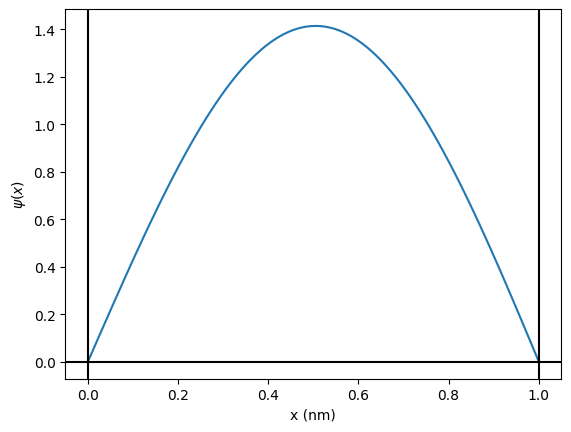

In [5]:
def plot_psi_well():
    plt.axvline(0.0, color="k")
    plt.axvline(1.0, color="k")
    plt.axhline(0.0, color="k")

    plt.xlabel("x (nm)")
    plt.ylabel("$\\psi(x)$")


x = np.linspace(0, 1, 100)
Vx = np.zeros_like(x)
psi_1 = shoot_infinite_SW(0.376, x, Vx)

plt.plot(x, psi_1)
plot_psi_well()

This looks good, but it's also cheating a bit since we know exactly the right solution for $E$.  __Run the cell below__ to see what a shot with a value of $E$ that doesn't have a valid solution looks like.  The difference between this solution and the correct right boundary $\psi(L) = 0$ is what we'll try to take to zero by shooting.

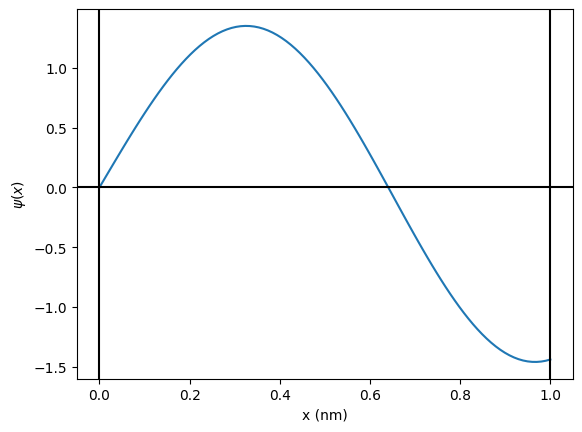

In [4]:
x = np.linspace(0, 1, 100)
Vx = np.zeros_like(x)
psi_wrong = shoot_infinite_SW(0.918, x, Vx)

plt.plot(x, psi_wrong)
plot_psi_well()

### Part B

Now let's properly solve the boundary-value problem, forgetting we know the exact solutions for $E_n$.

__Implement the function `solve_infinite_SW` below__, which will use `shoot_infinite_SW()` to find a solution with the correct energy by shooting.  The algorithm is simple: 

* Define a black-box function `delta_boundary(E)` that tells us how much a solution for a given `E` misses the right boundary by;
* Use a standard root-finding algorithm on `delta_boundary(E)` to find where the solution works, i.e. where it misses by (approximately) zero.

This is a little trickier, and we'll be doing something we've never done before: defining a function _within_ a function.  I've again provided comments to guide you through.

In [5]:
from scipy.optimize import newton


def solve_infinite_SW(E_guess, x, Vx):
    """
    Uses shooting to solve the boundary-value problem in the infinite square well.

    Arguments:
    -----
    * E_guess: initial guess for E.
    * x: array containing discrete range of x-values over the extent
         of the square well [in nm.]
    * Vx: array containing the potential V(x) *inside* the square well.
          The simplest case is V(x) = 0.

    Returns:
    -----
    E, psi_E: solution energy E [float] and wavefunction psi_E(x) [array, same length as x.]

    """

    # Define the function delta_boundary(E).
    # Note: to work properly with the root-finding techniques,
    # this had better be a function of E only!
    def delta_boundary(E):
        pass  # Remove this and add your code!

        # Call shoot_infinite_SW to find psi for this E

        # Return the difference (not absolute value!)
        # between the solution at the right boundary, psi(L),
        # and the correct boundary value, 0

    # Use the newton() root-finder on the delta_boundary function, using the initial guess E_guess.
    # newton() will return its estimate of the value of the root, E.

    # Call shoot_infinite_SW one more time on the result E from newton(),
    # to get the wavefunction psi_E for the energy we found.

    ### BEGIN SOLUTION
    def delta_boundary(E):
        psi_E = shoot_infinite_SW(E, x, Vx)
        return psi_E[-1]

    E = newton(delta_boundary, E_guess)

    psi_E = shoot_infinite_SW(E, x, Vx)
    ### END SOLUTION

    # Return both the energy E and the solution psi_E, as a tuple
    return E, psi_E

__Run the cell below__ to try your code with an initial guess of $E = 0.5$ eV; you should recover the correct ground-state energy of about 0.376 eV!

Found energy E=0.37603440684212414


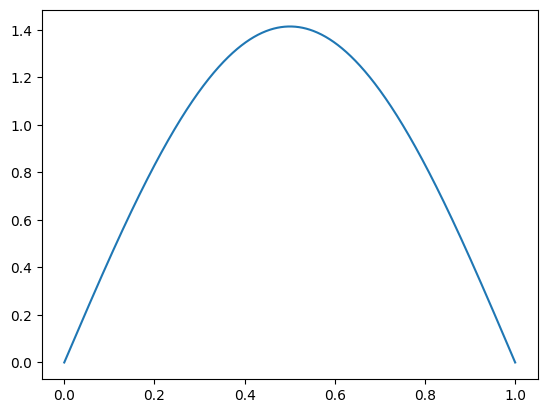

In [6]:
x = np.linspace(0, 1, 1000)
Vx = np.zeros_like(x)
E, psi = solve_infinite_SW(0.5, x, Vx)


print(f"Found energy E={E}")
plt.plot(x, psi)

### Part C

__Use your code to find the next three energy levels__ and corresponding wavefunctions.  I've set everything up already: you'll just need to adjust the initial guesses, which are currently all giving the _first_ energy level $E_1$.

Remember, the exact answers are: $E_n = \{0.376, 1.504, 3.384, 6.016, ...\}\ {\rm eV}$.

1.5041673779628189
3.3844881701469216
6.0171455613768385


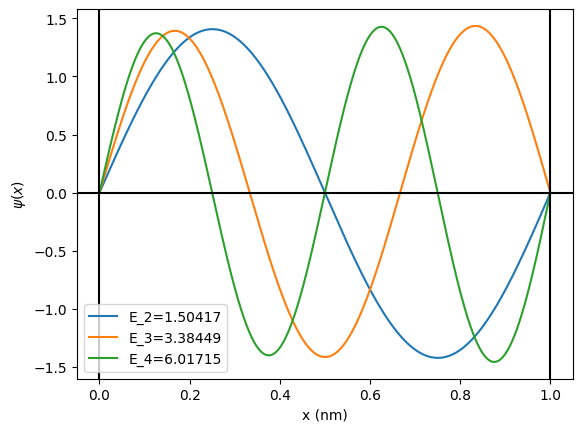

In [7]:
E2_guess = 0.5
E3_guess = 0.5
E4_guess = 0.5

### BEGIN SOLUTION
# We know the solutions grow roughly like n^2,
# so start from roughly E1 and scale up.
E2_guess = 4 * 0.3
E3_guess = 9 * 0.3
E4_guess = 16 * 0.3
### END SOLUTION


# Second energy level
E, psi = solve_infinite_SW(E2_guess, x, Vx)
print(E)
plt.plot(x, psi, label=f"E_2={E:g}")

# Third energy level
E, psi = solve_infinite_SW(E3_guess, x, Vx)
print(E)
plt.plot(x, psi, label=f"E_3={E:g}")

# Fourth energy level
E, psi = solve_infinite_SW(E4_guess, x, Vx)
print(E)
plt.plot(x, psi, label=f"E_4={E:g}")

plot_psi_well()
plt.legend()

Finally, __find the energy level closest to 100 eV__.  

__Important note:__ You can tell a bad solution because _all solutions should be symmetric about the middle of the well,_ so a bad solution will look lopsided.  To see this, you should definitely __plot your solution for $\psi(x)$!__  If your solution looks jagged or lopsided, increase the number of points until it looks correct.

96.26427483448296


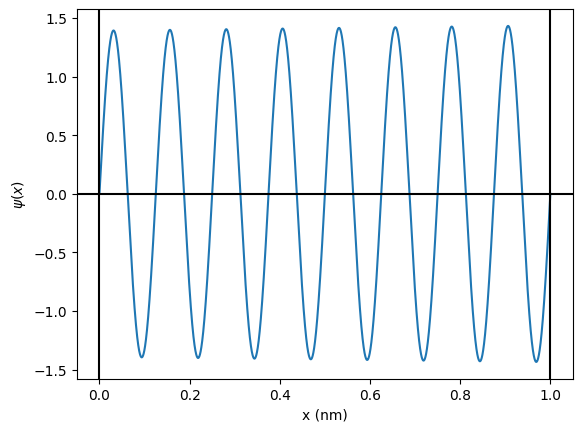

In [8]:
x = np.linspace(0, 1, 40000)
Vx = np.zeros_like(x)

E, psi = solve_infinite_SW(100, x, Vx)
print(E)
plt.plot(x, psi)
plot_psi_well()

# This turns out to be E_16, which we can verify from the energy formula,
# or by counting the number of peaks in the well (16!)

__Which energy level is this?__ (You can either use the exact formula for $E_n$, or just look at the plot and do some counting...)

__This turns out to be $E_{16}$, which we can verify from the energy formula, or by counting the number of peaks in the well (16 of them!)__

### Part D (optional challenge)

Finally, we're ready to move beyond what you already knew!  The functions you set up above allowed for a totally general $V(x)$ to be passed in.  We're still requiring $V(x)$ to exist __inside an infinite square well__, which restricts the set of problems we can solve.  But for example, we could imagine applying an _electric field_ to the electron in our well.  This gives a contribution to the potential of the form

$$
V_E = e|E| x
$$

If we apply a potential of 0.6 V across the well, then the electric field is 0.6 V/nm, giving the following for Vx:

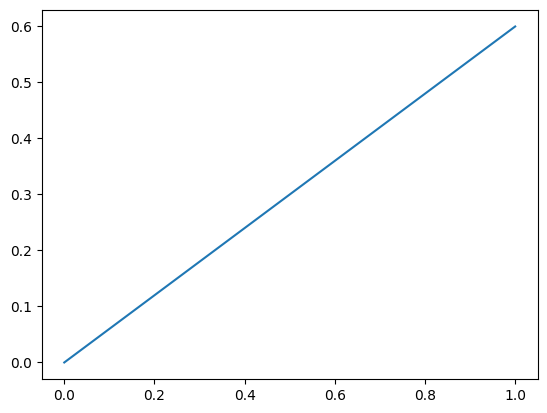

In [9]:
x = np.linspace(0, 1, 10000)
Vx = 0.6 * x
plt.plot(x, Vx)

__Use `solve_infinite_SW()` to find the ground-state solution__ for this potential well.  It should look like the ground-state solution we found above, but with an important difference - _can you spot the difference?_

(_Note: this version of the problem is much more numerically unstable than the ordinary well!  If you didn't have any trouble with the given electric field, try with the field strength set to 20 V/m instead of just 0.6!_)

Found energy E=0.6656855482789739


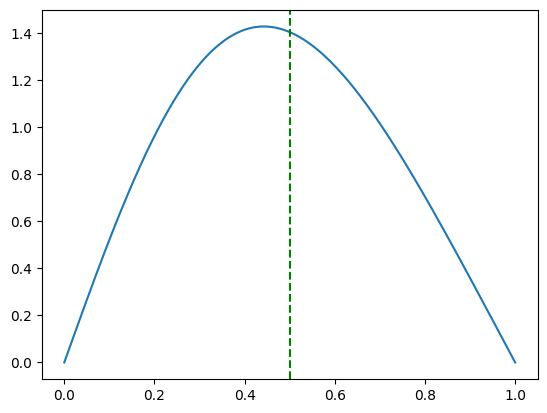

In [10]:
### BEGIN SOLUTION
E, psi = solve_infinite_SW(0.5, x, Vx)

print("Found energy E={}".format(E))
plt.plot(x, psi)
plt.axvline(0.5, color="g", linestyle="--")
# The applied electric field makes the wavefunction asymmetric,
# towards one side of the well.
### END SOLUTION